In [1]:
from sklearn.datasets import load_iris
import numpy as np

In [2]:
iris_data = load_iris()

In [3]:
index = range(100)

In [7]:
D = iris_data.data[index,:]
T = iris_data.target[index]

In [9]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X=D, y=T)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
pred_prob = lr_model.predict_proba(X=D)
pred_prob

array([[ 0.98390917,  0.01609083],
       [ 0.9644754 ,  0.0355246 ],
       [ 0.97670816,  0.02329184],
       [ 0.95694433,  0.04305567],
       [ 0.98549492,  0.01450508],
       [ 0.98103758,  0.01896242],
       [ 0.97497879,  0.02502121],
       [ 0.97593072,  0.02406928],
       [ 0.95033942,  0.04966058],
       [ 0.9652527 ,  0.0347473 ],
       [ 0.98666133,  0.01333867],
       [ 0.96761024,  0.03238976],
       [ 0.96647839,  0.03352161],
       [ 0.97874802,  0.02125198],
       [ 0.9962299 ,  0.0037701 ],
       [ 0.99476333,  0.00523667],
       [ 0.99217185,  0.00782815],
       [ 0.98223225,  0.01776775],
       [ 0.98241722,  0.01758278],
       [ 0.98560983,  0.01439017],
       [ 0.96824309,  0.03175691],
       [ 0.98165317,  0.01834683],
       [ 0.99297853,  0.00702147],
       [ 0.94514064,  0.05485936],
       [ 0.93848426,  0.06151574],
       [ 0.94755307,  0.05244693],
       [ 0.96362315,  0.03637685],
       [ 0.98073498,  0.01926502],
       [ 0.98215321,

In [11]:
threshold_vals = np.linspace(0.0,0.99,num=20)
threshold_vals

array([ 0.        ,  0.05210526,  0.10421053,  0.15631579,  0.20842105,
        0.26052632,  0.31263158,  0.36473684,  0.41684211,  0.46894737,
        0.52105263,  0.57315789,  0.62526316,  0.67736842,  0.72947368,
        0.78157895,  0.83368421,  0.88578947,  0.93789474,  0.99      ])

In [8]:
from sklearn.metrics import auc, roc_curve, confusion_matrix
tpr = []
fpr = []
for th in threshold_vals:
    y_cap = np.where(pred_prob[:,0]<th, 1,0)
    cm = confusion_matrix(y_true=T, y_pred=y_cap)
    #print(cm)
    tpr.append(cm[1,1]/sum(cm[1,:]))
    fpr.append(cm[0,1]/sum(cm[0,:]))

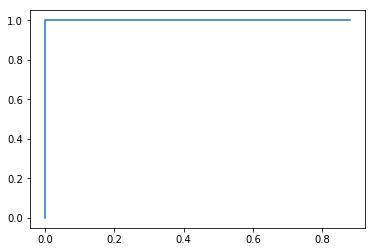

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(fpr, tpr)

In [10]:
tpr, fpr, th = roc_curve(T, pred_prob[:,0])

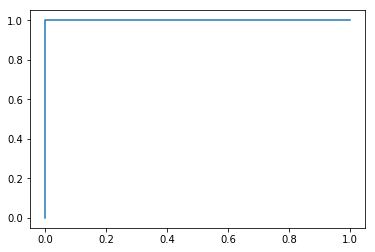

In [11]:
plt.plot(fpr, tpr)